In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
import torch
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-a87tevt3
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-a87tevt3
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=833460c07fe2dfdcfa0b8a80b9fa785d63975ead7b0e74fa37e17666e081d0e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-aajg6wt4/wheels/50/d5/0c/a58eabcbe90646a0801d1ed8011e1e517f6160bb03d22be4e7
Successfully built torchviz


In [2]:
num_items = 7
dim = 50
A_np = np.random.rand(num_items,dim)
B_np = np.random.rand(num_items,dim)

A_to = torch.rand(num_items,dim)
B_to = torch.rand(num_items,dim)

In [3]:
A_np.shape, B_np.shape, A_to.shape, B_to.shape

((7, 50), (7, 50), torch.Size([7, 50]), torch.Size([7, 50]))

In [4]:
def dot_prod_novec(A,B):
  s = time.time()
  op_list = []
  for idx in range(len(A)): 
    op_list.append(sum(A[idx]*B[idx]))  
  
  return (np.array(op_list), time.time()-s)


def dot_prod_vec(A,B):
  s = time.time()
  output = (A*B).sum(-1)
  return (output, time.time()-s)



In [5]:
op_vec, time_vec = dot_prod_vec(A_np,B_np)
op_novec, time_novec = dot_prod_novec(A_np,B_np)
#assert (op_vec == op_novec).all()
assert np.allclose(op_vec,op_novec)

In [6]:
op_vec, time_vec = dot_prod_vec(A_to,B_to)
op_novec, time_novec = dot_prod_novec(A_to,B_to)
#assert (op_vec == op_novec).all()
assert np.allclose(op_vec,op_novec)

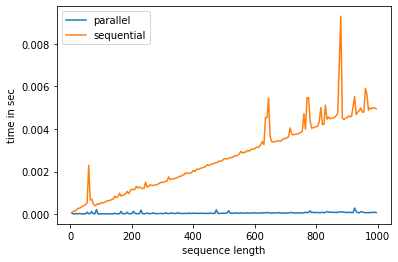

In [7]:
time_parallel = []
time_seq = []
for num_items in range(5,1000,5):
  A = np.random.rand(num_items,dim)
  B = np.random.rand(num_items,dim)   
  op_vec, time_vec = dot_prod_vec(A,B)
  op_novec, time_novec = dot_prod_novec(A,B)
  #assert (op_vec == op_novec).all()
  assert np.allclose(op_vec,op_novec)
  time_parallel.append(time_vec)
  time_seq.append(time_novec)

####IMAGE#####
plt.plot(list( range(5,1000,5)),time_parallel,label='parallel')
plt.plot(list( range(5,1000,5)),time_seq,label='sequential')
plt.ylabel("time in sec",fontsize=10)
plt.xlabel("sequence length",fontsize=10)
plt.legend()
plt.show()

In [38]:
A = np.random.rand(3,5)
B = np.random.rand(3,5)
(A*B).sum(-1)

array([1.12444121, 2.21119387, 1.56042506])

In [41]:
sum((A*B)[0]),sum((A*B)[1]), sum((A*B)[2])

(1.124441208717966, 2.2111938674686114, 1.560425062923481)

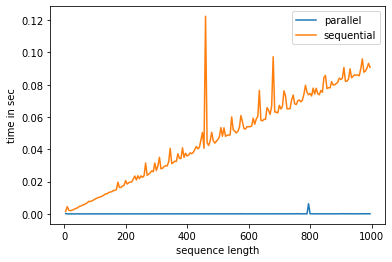

In [8]:
time_parallel = []
time_seq = []
for num_items in range(5,1000,5):
  A = torch.rand(num_items,dim)
  B = torch.rand(num_items,dim)   
  op_vec, time_vec = dot_prod_vec(A,B)
  op_novec, time_novec = dot_prod_novec(A,B)
  #assert (op_vec == op_novec).all()
  assert np.allclose(op_vec,op_novec)
  time_parallel.append(time_vec)
  time_seq.append(time_novec)

####IMAGE#####
plt.plot(list( range(5,1000,5)),time_parallel,label='parallel')
plt.plot(list( range(5,1000,5)),time_seq,label='sequential')
plt.ylabel("time in sec",fontsize=10)
plt.xlabel("sequence length",fontsize=10)
plt.legend()
plt.show()

$\max_{\{a \in A, b \in B\}} max\{0,a-b\}$



In [2]:
def all_pair_hinge_diff_max(A,B):
  s = time.time()
  maxVal=0
  for a in A:
    for b in B: 
      val = max(0,a-b)
      maxVal = max(maxVal, val)
  return maxVal, time.time()-s


def all_pair_hinge_diff_max_vec(A,B):
  s = time.time()
  maxVal = np.max(np.maximum(0,A[:,None] - B[None,:]))
  return maxVal, time.time()-s


In [43]:
A = np.random.rand(5)
B = np.random.rand(5)

In [47]:
A[None,:].shape, A[:,None].shape

((1, 5), (5, 1))

In [24]:
assert(all_pair_hinge_diff_max(A,B)[0] == all_pair_hinge_diff_max(A,B)[0])

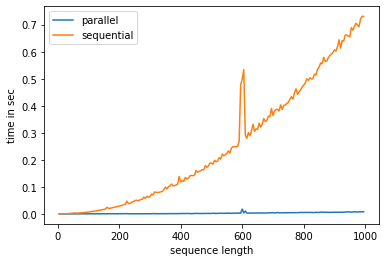

In [3]:
time_parallel = []
time_seq = []
for num_items in range(5,1000,5):
  A = np.random.rand(num_items)
  B = np.random.rand(num_items)   
  op_vec, time_vec = all_pair_hinge_diff_max_vec(A,B)
  op_novec, time_novec = all_pair_hinge_diff_max(A,B)
  #assert (op_vec == op_novec).all()
  assert np.allclose(op_vec,op_novec)
  time_parallel.append(time_vec)
  time_seq.append(time_novec)

####IMAGE#####
plt.plot(list( range(5,1000,5)),time_parallel,label='parallel')
plt.plot(list( range(5,1000,5)),time_seq,label='sequential')
plt.ylabel("time in sec",fontsize=10)
plt.xlabel("sequence length",fontsize=10)
plt.legend()
plt.show()

When talking about neural networks in any context, [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is an important topic to understand because it is the algorithm used for training deep neural networks. 

Backpropagation is used to calculate derivatives which is what you need to keep optimizing parameters of the model and allowing the model to learn on the task at hand. 

Many of the deep learning frameworks today like PyTorch does the backpropagation out-of-the-box using [**automatic differentiation**](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). 

To better understand how this is done it's important to talk about **computational graphs** which defines the flow of computations that are carried out throughout the network. This in turn helps the autograd engine to perform automatic differentiation and backpropagation.   

#This is a normal torch tensor 


In [32]:
x = torch.tensor([[1.0, 3.0],
                  [2.0, -1.0],
                  [0.0, 1.0]])
print(x)
print(f"Note that for this tensor requires_grad is set to {x.requires_grad}")

tensor([[ 1.,  3.],
        [ 2., -1.],
        [ 0.,  1.]])
Note that for this tensor requires_grad is set to False


#This torch tensor has  `requires_grad=True` to tell the autograd engine that every operation on them should be tracked. 




In [33]:
x = torch.tensor([[1.0, 3.0],
                  [2.0, -1.0],
                  [0.0, 1.0]], requires_grad=True)
print(x)
print(f"Note that for this tensor requires_grad is set to {x.requires_grad}")

tensor([[ 1.,  3.],
        [ 2., -1.],
        [ 0.,  1.]], requires_grad=True)
Note that for this tensor requires_grad is set to True


### Computational Graphs










tensor(2., grad_fn=<MulBackward0>)


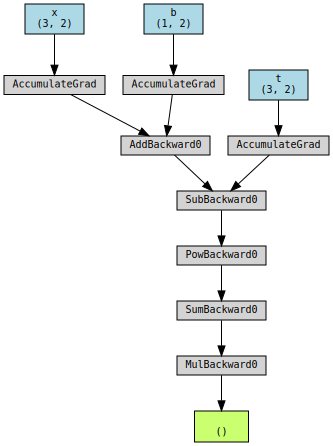

In [34]:
x = torch.tensor([[1.0, 3.0],
                  [2.0, -1.0],
                  [0.0, 1.0]], requires_grad=True)
b = torch.tensor([[2.0, 1.0]], requires_grad=True)


y = x + b

t = torch.tensor([[2.0, 4.0],
                  [4.0, 1.0],
                  [1.0, 1.0]], requires_grad=True)

error = 0.5 * torch.sum((y-t)**2)  
print(error)
make_dot(error,params={'x':x, 'b':b, 't':t})
# make_dot(error,params={'x':x, 'b':b, 't':t}, show_attrs=True, show_saved=True)
# y.retain_grad() 
# error.backward()

# print('dy =', y.grad)
# print('dx =', x.grad)
# print('db =', b.grad)  

tensor(2., grad_fn=<MulBackward0>)


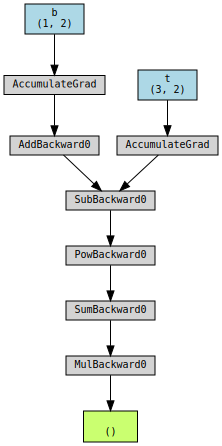

In [35]:
x = torch.tensor([[1.0, 3.0],
                  [2.0, -1.0],
                  [0.0, 1.0]], requires_grad=False)
b = torch.tensor([[2.0, 1.0]], requires_grad=True)


y = x + b

t = torch.tensor([[2.0, 4.0],
                  [4.0, 1.0],
                  [1.0, 1.0]], requires_grad=True)

error = 0.5 * torch.sum((y-t)**2)  
print(error)
make_dot(error,params={'x':x, 'b':b, 't':t})
  

In [36]:
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
linear1 = torch.nn.Linear(5,2)
print( f"Initialized Layer {linear1}")

Initialized Layer Linear(in_features=5, out_features=2, bias=True)


In [37]:
linear1.weight, linear1.bias

(Parameter containing:
 tensor([[ 0.1246, -0.2063,  0.0175, -0.2242, -0.2169],
         [ 0.3663,  0.2014, -0.1040, -0.3814,  0.1455]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3500, -0.0708], requires_grad=True))

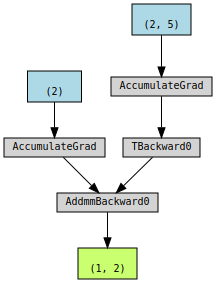

In [38]:
a = torch.rand((1,5))
op = linear1(a)
make_dot(op)

#Variable vs Parameter
The difference between a Variable and a Parameter comes in when associated with a model. When a Parameter is associated with a model as an attribute, it gets added to the parameter list automatically and can be accessed using the 'parameters' iterator.

##NOTE: If you are defining your own weights, make sure they are torch.nn.Parameter
#Parameters have require_grad set by default.

Initialized weight paramter Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)
Initialized weight paramter Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)


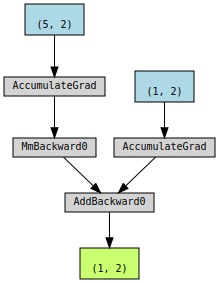

In [39]:
my_weight_param = torch.nn.Parameter(torch.zeros(5,2))
my_bias_param   = torch.nn.Parameter(torch.ones(2))
print(f"Initialized weight paramter {my_weight_param}")
print(f"Initialized weight paramter {my_weight_param}")
a = torch.rand((1,5))
op = a@my_weight_param + b
make_dot(op)


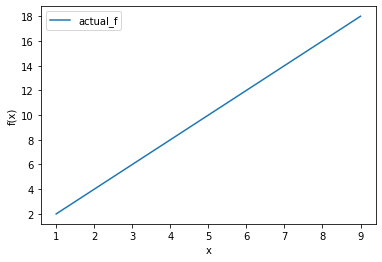

In [130]:
def actual_func(input_tensor):
  output_tensor = 2*input_tensor
  return output_tensor

X = torch.arange(1,10,dtype=torch.float32)[:,None]
Y = actual_func(X)
plt.plot(X,Y,label='actual_f')
plt.ylabel("f(x)",fontsize=10)
plt.xlabel("x",fontsize=10)
plt.legend()
plt.show()

In [131]:
class LinReg(torch.nn.Module):
  def __init__(self):
    super(LinReg, self).__init__()
    self.lin = torch.nn.Linear(1, 1)

  def forward(self, x):
	  return self.lin(x)
		

In [141]:
model=LinReg()
model

LinReg(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

In [142]:
model(X)

tensor([[-0.0098],
        [-0.3106],
        [-0.6113],
        [-0.9120],
        [-1.2128],
        [-1.5135],
        [-1.8142],
        [-2.1150],
        [-2.4157]], grad_fn=<AddmmBackward0>)

In [143]:
model(X).detach()

tensor([[-0.0098],
        [-0.3106],
        [-0.6113],
        [-0.9120],
        [-1.2128],
        [-1.5135],
        [-1.8142],
        [-2.1150],
        [-2.4157]])

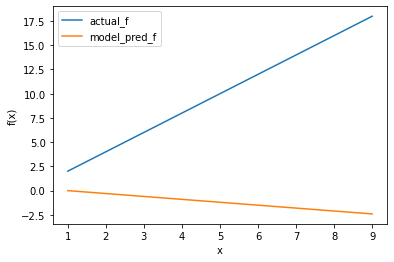

In [144]:
plt.plot(X,Y,label='actual_f')
plt.plot(X,model(X).detach(),label='model_pred_f')
plt.ylabel("f(x)",fontsize=10)
plt.xlabel("x",fontsize=10)
plt.legend()
plt.show()

In [145]:
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr = 0.01)




0


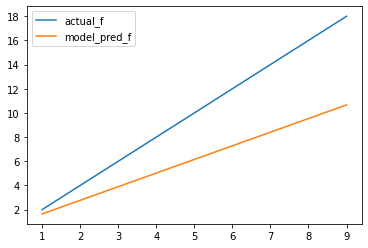

1


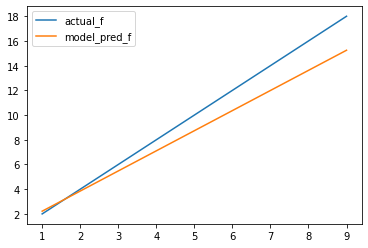

2


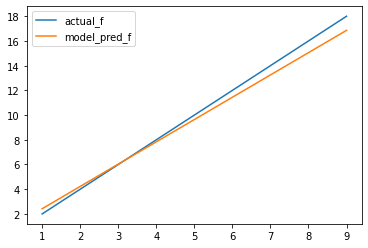

3


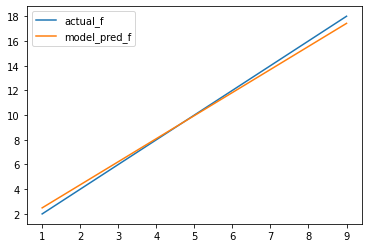

4


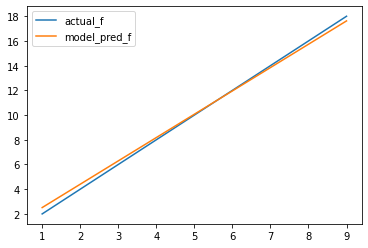

In [146]:
epoch_loss= []

for epoch in range(5):
  loss = loss_fn(model(X), Y)
  opt.zero_grad()
  loss.backward()
  opt.step()
  epoch_loss.append(loss.item())
  if epoch%1==0:
    print(epoch)
    plt.plot(X,Y,label='actual_f')
    plt.plot(X,model(X).detach(),label='model_pred_f')
    plt.legend()
    plt.show()


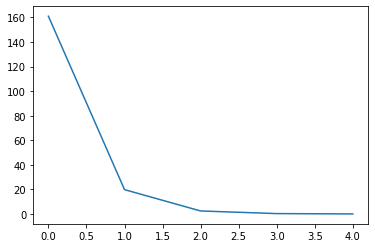

In [147]:
plt.plot(epoch_loss)

In [220]:
def actual_func(input_tensor):
  output_tensor = input_tensor.sum(-1)
  return output_tensor[:,None]

X = torch.rand(500,17,dtype=torch.float32)
Y = actual_func(X)


In [221]:
class LinReg(torch.nn.Module):
  def __init__(self):
    super(LinReg, self).__init__()
    self.lin = torch.nn.Linear(17, 1)
    # self.lin = torch.nn.Linear(17, 5)
    # self.lin1 = torch.nn.Linear(5, 1)
    # self.relu = torch.nn.ReLU()

  def forward(self, x):
	  return self.lin(x)
	  # return self.lin1(self.relu( self.lin(x) ) )
		

In [242]:
model=LinReg()
model

LinReg(
  (lin): Linear(in_features=17, out_features=1, bias=True)
)

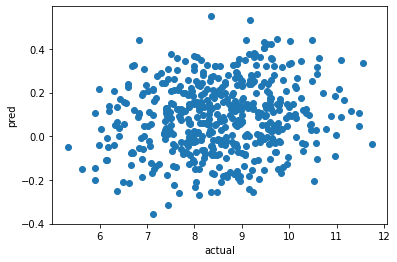

In [243]:
plt.scatter(Y,model(X).detach())
plt.ylabel("pred",fontsize=10)
plt.xlabel("actual",fontsize=10)
plt.show()

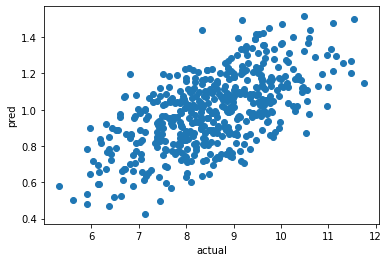

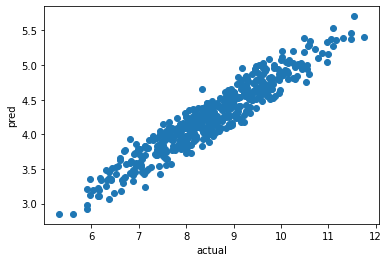

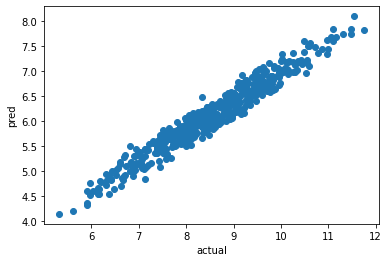

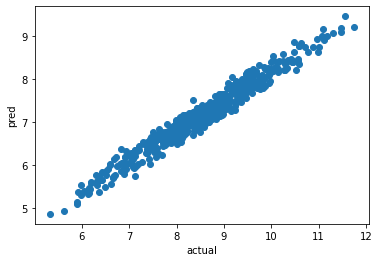

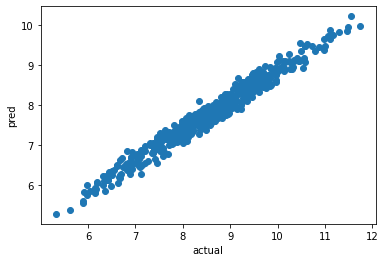

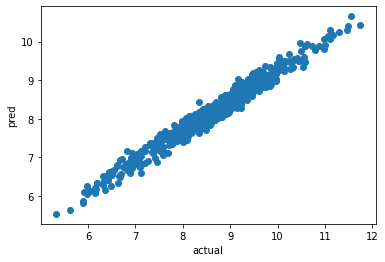

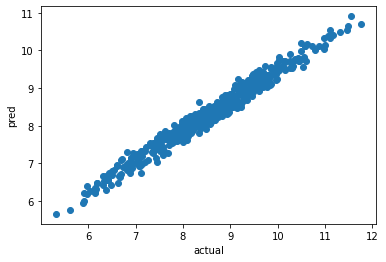

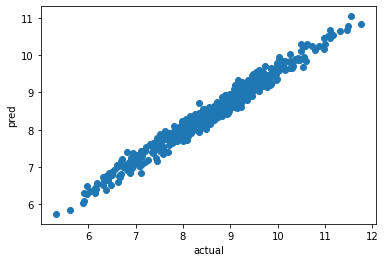

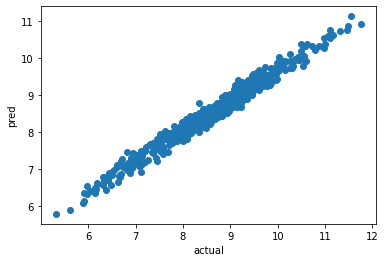

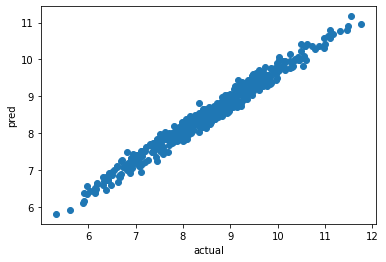

In [244]:
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr = 0.01)

epoch_loss= []

for epoch in range(50):
  loss = loss_fn(model(X), Y)
  # loss = (model(X)- Y).sum(-1)
  opt.zero_grad()
  loss.backward()
  opt.step()
  epoch_loss.append(loss.item())
  if epoch%5==0:
    plt.scatter(Y,model(X).detach())
    plt.ylabel("pred",fontsize=10)
    plt.xlabel("actual",fontsize=10)
    plt.show()



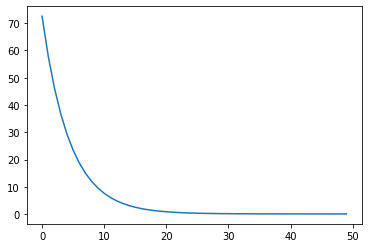

In [245]:
plt.plot(epoch_loss)

In [246]:
model.lin.weight

Parameter containing:
tensor([[0.6808, 0.6795, 1.0332, 0.8521, 0.9310, 0.8459, 0.8156, 0.8364, 0.9476,
         0.9933, 0.8456, 0.6551, 0.7256, 1.0062, 0.9115, 0.6221, 0.7468]],
       requires_grad=True)

In [247]:
model.lin.bias

Parameter containing:
tensor([1.4216], requires_grad=True)

In [413]:
def actual_func(input_tensor):
  output_tensor =  (torch.pow(input_tensor,2) + torch.pow(input_tensor,1) + 1).sum(-1)
  return output_tensor[:,None]

X = torch.arange(1,100,dtype=torch.float32)[:,None]
Y = actual_func(X)


In [478]:
class LinReg(torch.nn.Module):
  def __init__(self):
    super(LinReg, self).__init__()
    # self.lin = torch.nn.Linear(1, 1)
    self.lin = torch.nn.Linear(1, 100)
    self.lin1 = torch.nn.Linear(100, 100)
    self.lin2 = torch.nn.Linear(100, 100)
    self.lin3 = torch.nn.Linear(100, 1)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
	  # return self.lin(x)
	  return self.lin3(self.relu( self.lin2(self.relu( self.lin1(self.relu( self.lin(x)))))))
		

In [479]:
model=LinReg()
model

LinReg(
  (lin): Linear(in_features=1, out_features=100, bias=True)
  (lin1): Linear(in_features=100, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

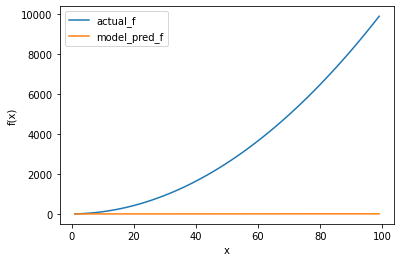

In [480]:
plt.plot(X,Y,label='actual_f')
plt.plot(X,model(X).detach(),label='model_pred_f')
plt.ylabel("f(x)",fontsize=10)
plt.xlabel("x",fontsize=10)
plt.legend()
plt.show()

0


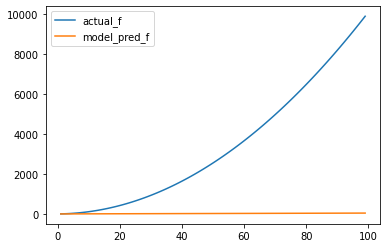

50


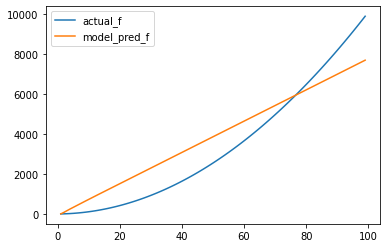

100


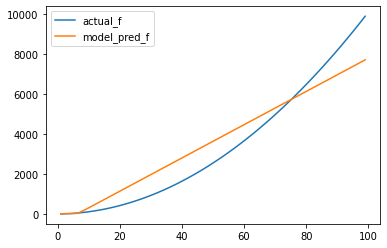

150


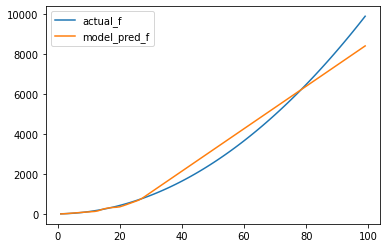

200


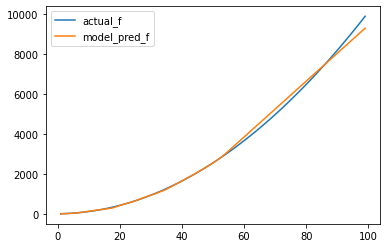

250


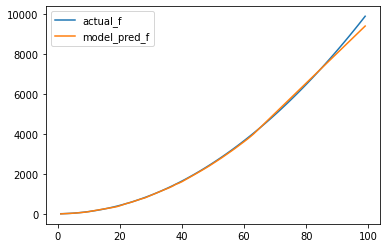

300


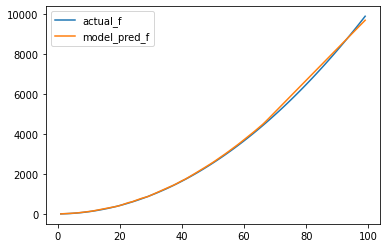

350


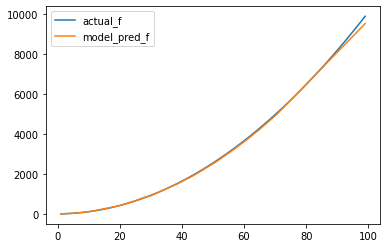

400


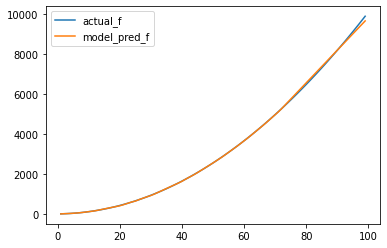

450


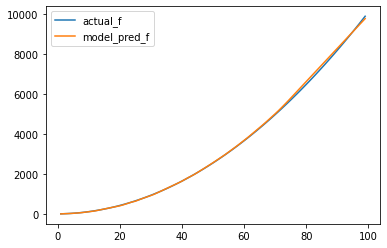

In [482]:
loss_fn = torch.nn.MSELoss()
model=LinReg()

opt = torch.optim.Adam(model.parameters(), lr = 0.01)
# opt = torch.optim.Adam(model.parameters(), lr = 1)



epoch_loss= []

for epoch in range(500):
  loss = loss_fn(model(X), Y)
  opt.zero_grad()
  loss.backward()
  opt.step()
  epoch_loss.append(loss.item())
  if epoch%50==0:
    print(epoch)
    plt.plot(X,Y,label='actual_f')
    plt.plot(X,model(X).detach(),label='model_pred_f')
    plt.legend()
    plt.show()


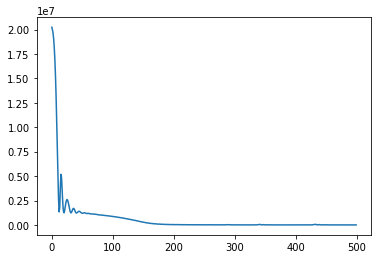

In [483]:
plt.plot(epoch_loss)